# Solitões

Importando as bibliotecas

In [5]:
import matplotlib as mpl
from pylab import cm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.optimize import curve_fit

Definem-se as funções auxiliares

In [6]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        dados = file.readlines()

    cor1_x  = list()
    cor1_y  = list()

    cor2_x  = list()
    cor2_y  = list()

    tempo   = list()

    for linha in dados[2:]:
        var      = linha.split()

        tempo   += [float(var[0].replace(',','.'))]

        cor1_x  += [float(var[1].replace(',','.'))]
        cor1_y  += [float(var[2].replace(',','.'))]

        cor2_x  += [float(var[3].replace(',','.'))]
        cor2_y  += [float(var[4].replace(',','.').replace('\x00', ''))]
    return tempo, cor1_x, cor1_y, cor2_x, cor2_y

In [7]:
def chi_sq(obs, exp):
    soma = 0
    assert(len(obs) == len(exp)) #ERRO DE DIMENSÕES
    for i in range(len(obs)):
        soma += pow((obs[i] - exp[i]), 2)/exp[i]
    return soma
        

criando um objeto DataFrame, que será exportado para um excel (.csv)

In [3]:
#sheets = pd.DataFrame({'tempo': tempo, 'cor1_x': cor1_x, 'cor1_y': cor1_y, 'cor2_x': cor2_x, 'cor2_y': cor2_y})
#sheets.to_csv('ponham_me_no_google_sheets_pls/h8B10A2.csv')

### Embelezando

In [8]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 2)

# Dados/h6B20A2.txt

In [9]:
tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file('Dados/h6B20A2.txt')

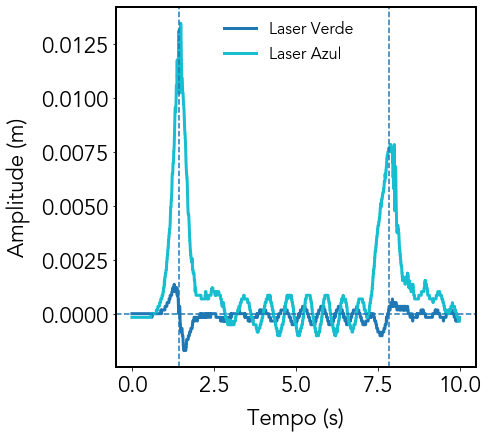

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel('Tempo (s)', labelpad=10)
ax.set_ylabel('Amplitude (m)', labelpad=10)

plt.plot(tempo, cor1_x, lw = '3', color=colors(0), label="Laser Verde")
plt.plot(tempo, cor1_y, lw = '3', color=colors(1), label="Laser Azul")

plt.axvline(7.85, linestyle='--')
plt.axvline(1.45, linestyle='--')
plt.axhline(0, linestyle='--')

ax.legend(bbox_to_anchor=(0.7, 1), loc=1, frameon=False, fontsize=16)

Queremos testar o modelo do sinh no primeiro pico

# MODELOS USADOS

## 1 Solitão

In [11]:
def fit_func(t, a, b, c):
    return a*pow(1/np.cosh(b - c*t), 2)

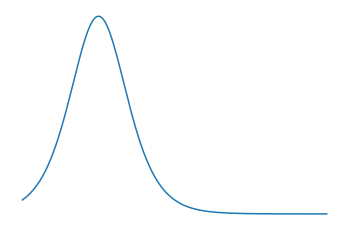

In [12]:
x = np.linspace(-4, 4, 1000)

plt.axis('off') 
plt.plot(x, fit_func(x, 1, -2, 1))

### Fit do solitão inicial

In [13]:
pars, cov = curve_fit(f=fit_func, xdata=tempo[:395], ydata=cor1_y[:395], p0=[0.0135, -5.8, -4], bounds=(-np.inf, np.inf))
sigmas    = np.sqrt(np.diag(cov))

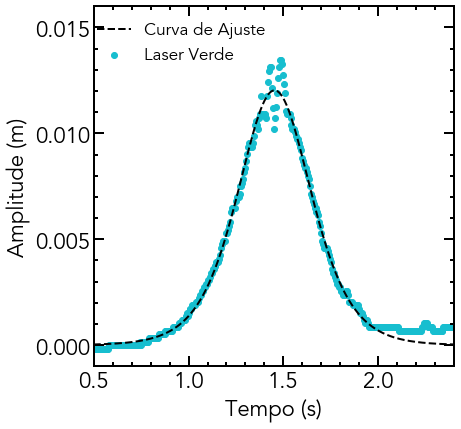

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(0.5, 2.4)
ax.set_ylim(-0.001, 0.016)

ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude (m)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.005))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

#plt.axhline(0, linestyle='--')
ax.scatter(tempo, np.array(cor1_y), lw = "1", color=colors(1), label="Laser Verde")

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
y = []
for i in tempo:
    y += [fit_func(i, pars[0], pars[1], pars[2])]

ax.plot(tempo, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")

ax.legend(bbox_to_anchor=(0.52, 1), loc=1, frameon=False, fontsize=17)

plt.savefig('h6B20A2_1.png', transparent=False, bbox_inches='tight')

In [16]:
chi_sq(y[:395], cor1_y[:395])

/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


-inf

### Fit do solitão refletido

In [11]:
pars, cov = curve_fit(f=fit_func, xdata=tempo[1380:1692], ydata=cor1_y[1380:1692], p0=[0.008, -23.4, -3], bounds=(-np.inf, np.inf))
sigmas    = np.sqrt(np.diag(cov))

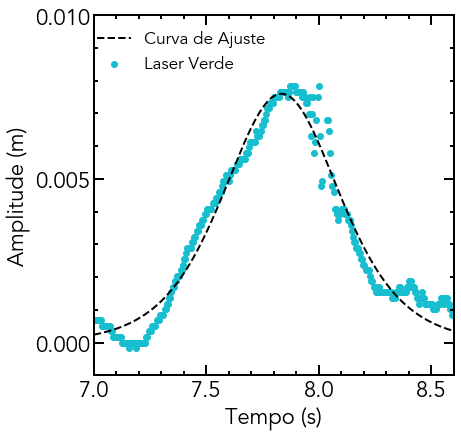

In [12]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(7, 8.6)
ax.set_ylim(-0.001, 0.01)

ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude (m)')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=4, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=4, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.005))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.001))

#plt.axhline(0, linestyle='--')
ax.scatter(tempo, np.array(cor1_y), lw = "1", color=colors(1), label="Laser Verde")

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO
y = []
for i in tempo:
    y += [fit_func(i, pars[0], pars[1], pars[2])]

ax.plot(tempo, y, linestyle='--', linewidth=2, color='black', label="Curva de Ajuste")

ax.legend(bbox_to_anchor=(0.52, 1), loc=1, frameon=False, fontsize=17)

plt.savefig('h6B20A2_2.png', transparent=False, bbox_inches='tight')

# Dados/h4B40A1.txt

In [13]:
tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file('Dados/h4B40A1.txt')

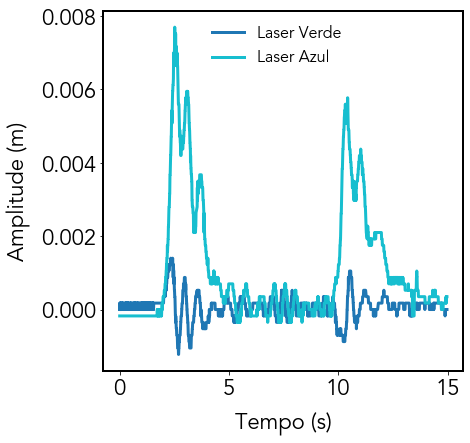

In [14]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel('Tempo (s)', labelpad=10)
ax.set_ylabel('Amplitude (m)', labelpad=10)

plt.plot(tempo, cor1_x, lw = '3', color=colors(0), label="Laser Verde")
plt.plot(tempo, cor1_y, lw = '3', color=colors(1), label="Laser Azul")

ax.legend(bbox_to_anchor=(0.7, 1), loc=1, frameon=False, fontsize=16)

# Testating as aproximiações iniciais para os parametros dos fits

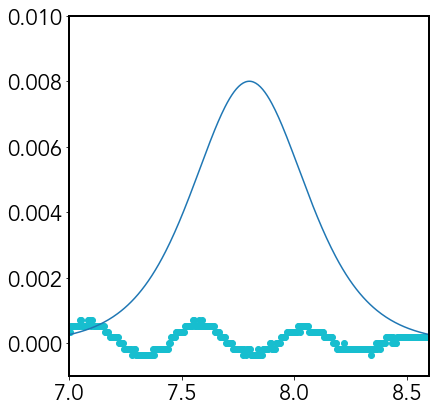

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(7, 8.6)
ax.set_ylim(-0.001, 0.01)

ax.scatter(tempo, cor1_y, lw = "1", color=colors(1))

#ARRANJAR FORMAMAIS EFICIENTE DE FAZER ISTO ----- PROCURAR APROXIMAÇÕES INICIAIS
y = []
for i in tempo:
    y += [fit_func(i, 0.008, -23.4, -3)]
    
ax.plot(tempo, y)